In [1]:
from apad_env import APADEnv, decode_action, PIECES
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy import stats
import pandas as pd

# Test

In [7]:
model = DQN.load("apad_dqn_model")
env = APADEnv()

Success rate: 0/100 (0.0%)


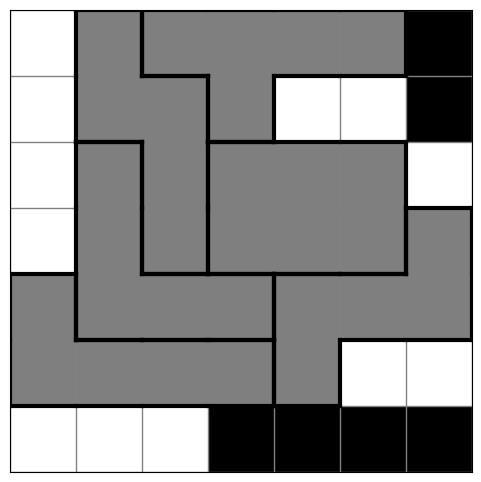

In [9]:
successes = 0
trials = 100

for i in range(trials):
    obs, _ = env.reset()
    while True:
        action, _ = model.predict(obs, deterministic=False)
        obs, reward, done, truncated, _ = env.step(action)
        if done or truncated:
            break
    
    if sum(env.remaining_pieces) == 0:
        successes += 1

print(f"Success rate: {successes}/{trials} ({successes/trials:.1%})")

# Show final state from last trial
env.visualize()

### % of invalid moves
Play a single game with model predictions and count the times we attempt an invalid move

Steps: 100, Invalid: 98
Steps: 200, Invalid: 197
Steps: 300, Invalid: 297
Steps: 400, Invalid: 397
Steps: 500, Invalid: 497
Steps: 600, Invalid: 597
Steps: 700, Invalid: 697
Steps: 800, Invalid: 797
Steps: 900, Invalid: 897
Steps: 1000, Invalid: 996
Total steps: 1001, Invalid moves: 997


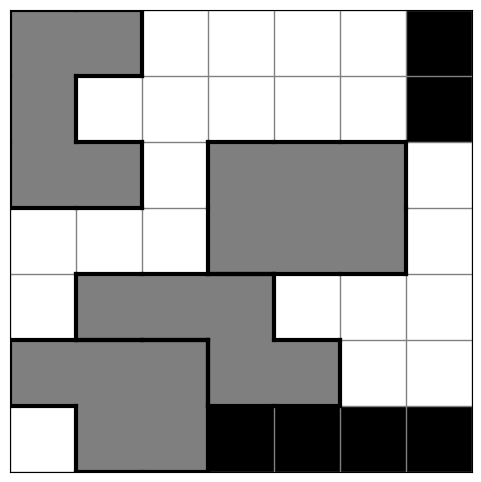

In [8]:
obs, _ = env.reset()
step_count = 0
invalid_count = 0

while True:
    action, _ = model.predict(obs, deterministic=False)
    obs, reward, done, truncated, _ = env.step(action)
    step_count += 1
    if reward < 0:  # Invalid move
        invalid_count += 1
    
    if step_count % 100 == 0:
        print(f"Steps: {step_count}, Invalid: {invalid_count}")
    
    if done or truncated or step_count > 1000:  # Add step limit
        break

print(f"Total steps: {step_count}, Invalid moves: {invalid_count}")

env.visualize()